<a href="https://colab.research.google.com/github/OJB-Quantum/Notebooks-for-Ideas/blob/main/Resistivity_vs_Temperature_of_NiO2_and_FeNNiO2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

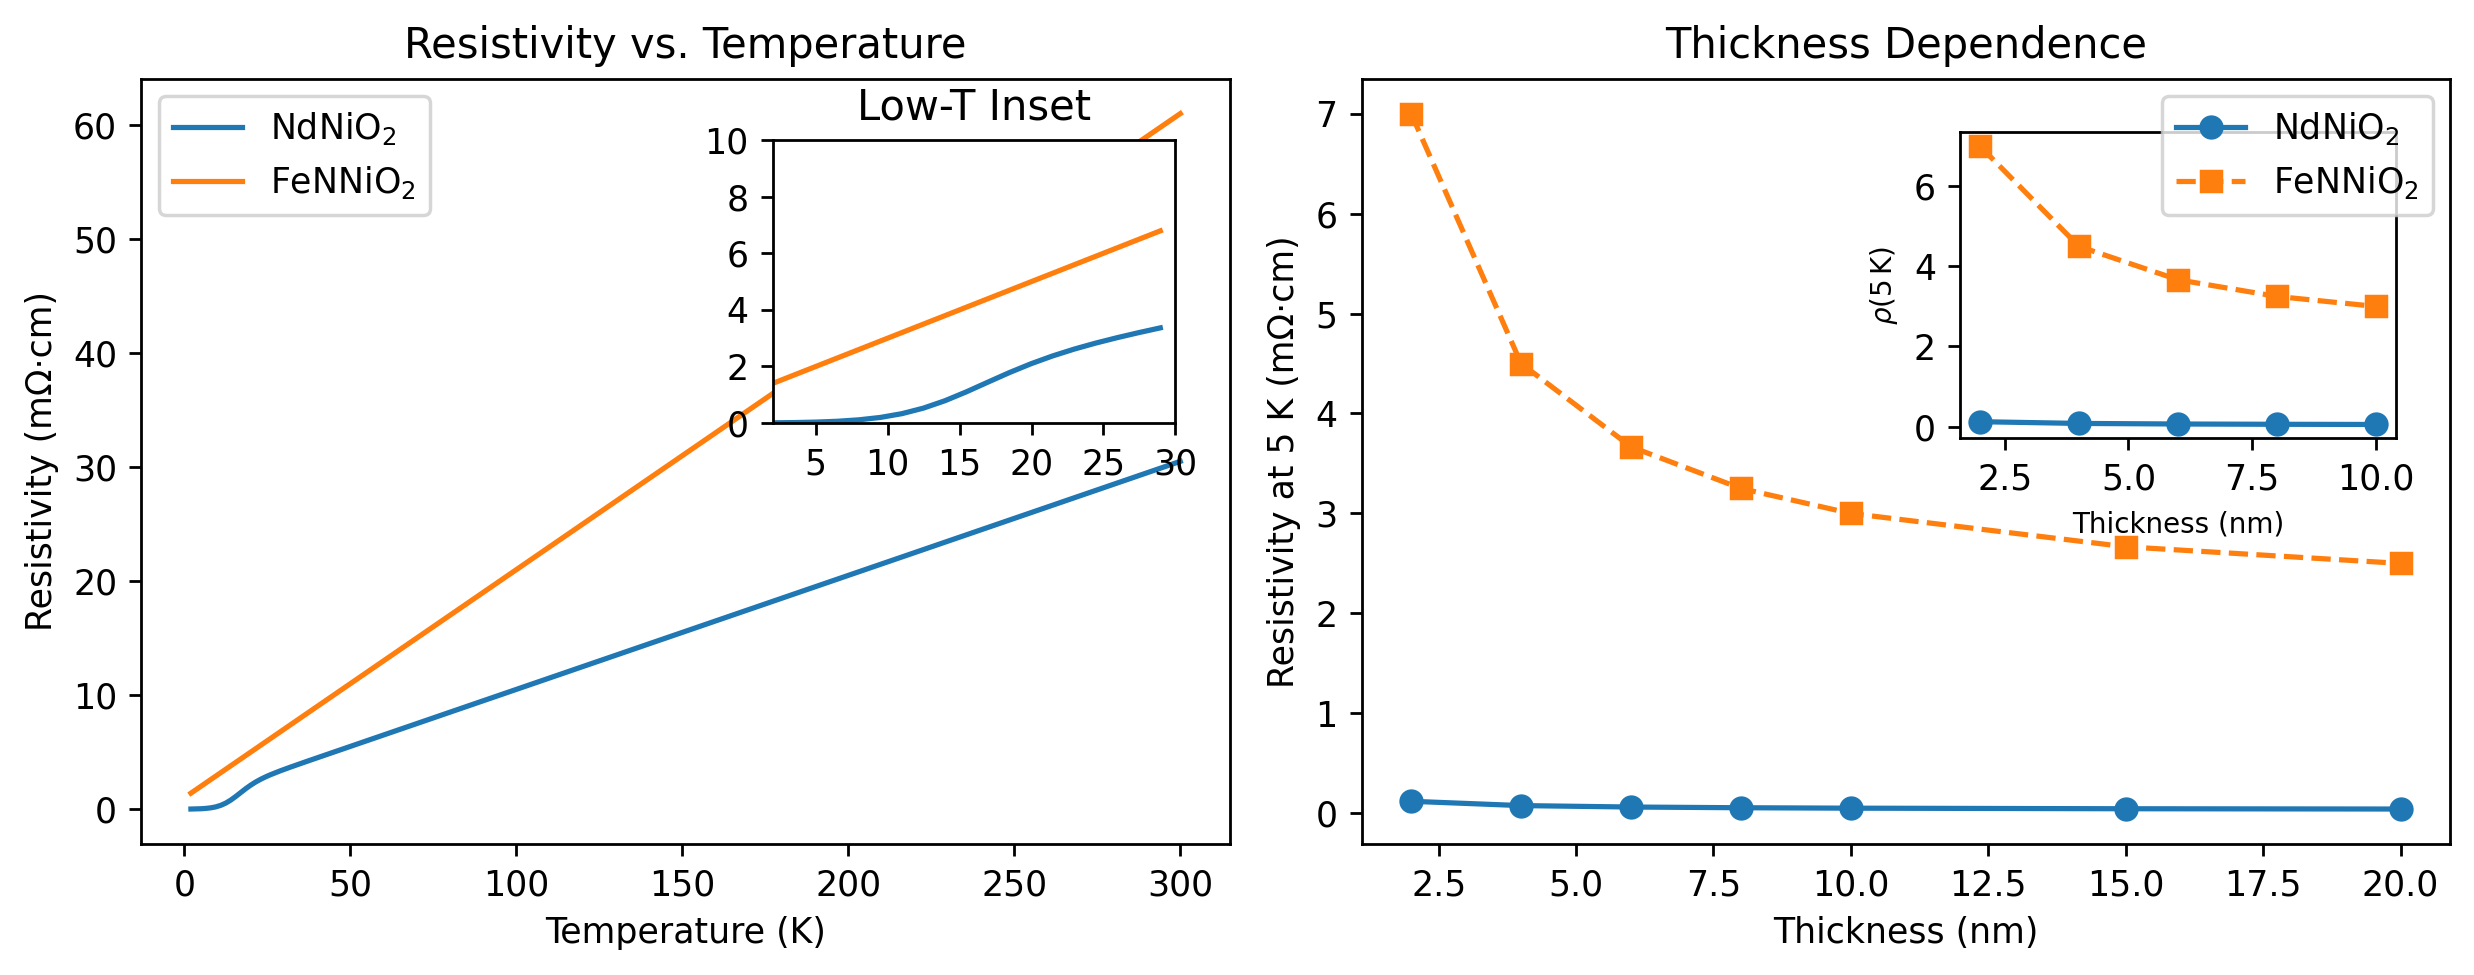

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Set the dpi using rcParams
plt.rcParams['figure.dpi'] = 250

# 1. Generation of mock temperature data

T = np.linspace(2, 300, 200)  # 2 K to 300 K
# For the sake of demonstration, we define simple piecewise functions.

def rho_NdNiO2(temp):
    """Mock resistivity for NdNiO2 with a superconducting drop ~15 K."""
    normal_resistivity = 0.5e-3 + 1e-4*(temp)  # linear metallic-like term
    sc_drop = 0.0
    # Superconducting transition: sharp drop below 15 K
    # We'll just crudely model it:
    transition_width = 3.0
    T_c = 15.0
    if isinstance(temp, np.ndarray):
        sc_factor = 1 / (1 + np.exp(-(temp - T_c)/transition_width))
        return normal_resistivity * sc_factor
    else:
        # For a scalar
        sc_factor = 1 / (1 + np.exp(-(temp - T_c)/transition_width))
        return normal_resistivity * sc_factor

def rho_FeNNiO2(temp):
    """Mock resistivity for FeNNiO2, no superconductivity, slightly higher scattering."""
    # Let's say it's purely metallic but with higher residual resistivity:
    return 1.0e-3 + 2e-4*(temp)

rho_nd = rho_NdNiO2(T)
rho_fe = rho_FeNNiO2(T)


# 2. Generate mock thickness dependence at low temperature

thicknesses = np.array([2, 4, 6, 8, 10, 15, 20])  # in nm
# We'll evaluate resistivity at T=5 K
T_low = 5

rho_nd_lowT = rho_NdNiO2(T_low) * (1.0 + (5.0/thicknesses))
# e.g., let's artificially scale with 1 + (constant/thickness) to simulate interface scattering

rho_fe_lowT = rho_FeNNiO2(T_low) * (1.0 + (5.0/thicknesses))


# 3. Plotting

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,4))

# --- (a) Resistivity vs Temperature ---
ax1.plot(T, rho_nd*1e3, label='NdNiO$_2$')
ax1.plot(T, rho_fe*1e3, label='FeNNiO$_2$')
ax1.set_xlabel('Temperature (K)')
ax1.set_ylabel('Resistivity (mΩ·cm)')  # Just an example unit
ax1.set_title('Resistivity vs. Temperature')
ax1.legend()
# ax1.grid(True)

# Inset for low temperature zoom
inset_ax1 = ax1.inset_axes([0.58, 0.55, 0.37, 0.37])  # [x0, y0, width, height]
lowT_mask = (T <= 30)
inset_ax1.plot(T[lowT_mask], (rho_nd*1e3)[lowT_mask], label='NdNiO$_2$')
inset_ax1.plot(T[lowT_mask], (rho_fe*1e3)[lowT_mask], label='FeNNiO$_2$')
inset_ax1.set_xlim(2, 30)
inset_ax1.set_ylim(0, 10)  # Adjust as needed
inset_ax1.set_xticks([5, 10, 15, 20, 25, 30])
inset_ax1.set_yticks([0, 2, 4, 6, 8, 10])
inset_ax1.set_title('Low-T Inset')
# inset_ax1.grid(True)

# --- (b) Thickness dependence of low-temperature resistivity ---
ax2.plot(thicknesses, rho_nd_lowT*1e3, 'o-', label='NdNiO$_2$')
ax2.plot(thicknesses, rho_fe_lowT*1e3, 's--', label='FeNNiO$_2$')
ax2.set_xlabel('Thickness (nm)')
ax2.set_ylabel(r'Resistivity at 5 K (mΩ·cm)')
ax2.set_title('Thickness Dependence')
ax2.legend()
# ax2.grid(True)

# Inset for focusing on thinner films
inset_ax2 = ax2.inset_axes([0.55, 0.53, 0.4, 0.4])
thin_mask = thicknesses <= 10
inset_ax2.plot(thicknesses[thin_mask], (rho_nd_lowT*1e3)[thin_mask], 'o-')
inset_ax2.plot(thicknesses[thin_mask], (rho_fe_lowT*1e3)[thin_mask], 's--')
inset_ax2.set_xlabel('Thickness (nm)', fontsize=8)
inset_ax2.set_ylabel(r'$\rho(5\,\mathrm{K})$', fontsize=8)
# inset_ax2.grid(True)

# Tight layout
plt.tight_layout()
plt.show()